In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("embedded_system_network_security_dataset.csv")

In [5]:
df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_flags_FIN   

In [6]:
df.isnull().sum()

packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
label                    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64

In [8]:
features = df[[
    'packet_size',
    'inter_arrival_time',
    'packet_count_5s',
    'mean_packet_size',
    'spectral_entropy',
    'frequency_band_energy'
]]


In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
model = IsolationForest(
    n_estimators=100,
    contamination=0.01,
    max_samples=256,
    random_state=42
)

model.fit(scaled_features)


,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",256
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.01
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [12]:
anomaly_labels = model.predict(scaled_features)

features['anomaly'] = anomaly_labels
features.head()


,packet_size,inter_arrival_time,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,anomaly
0,0.405154,0.620362,0.857143,0.0,0.834066,0.534891,1
1,0.527559,0.741288,0.785714,0.0,0.147196,0.990757,1
2,0.226199,0.485116,0.285714,0.0,0.855192,0.031781,1
3,0.573372,0.450965,0.142857,0.0,0.153220,0.169958,1
4,0.651396,0.888740,0.714286,0.0,0.923916,0.552053,1


In [13]:
features['anomaly'].value_counts()

anomaly
 1    990
-1     10
Name: count, dtype: int64

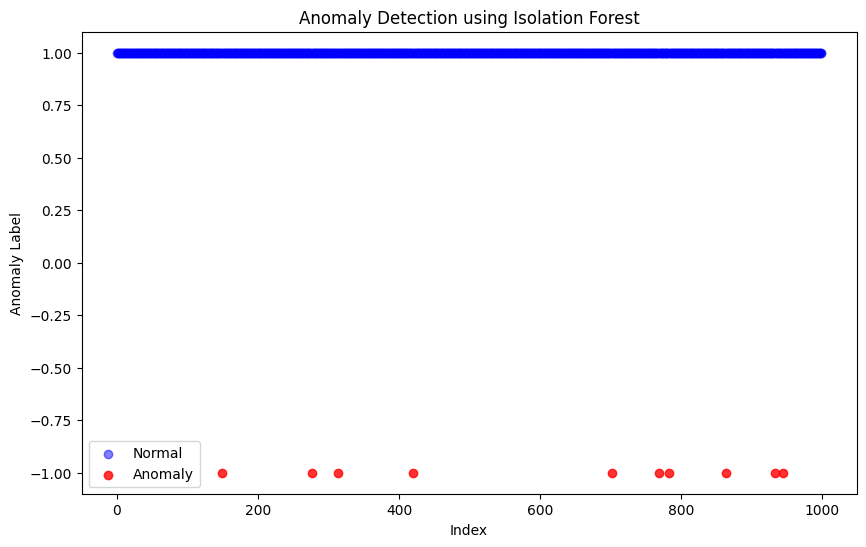

In [ ]:
plt.figure(figsize=(10,6))

normal_data = features[features['anomaly'] == 1]
anomalies = features[features['anomaly'] == -1]

plt.scatter(normal_data.index, normal_data['anomaly'],color='blue', label='Normal', alpha=0.5)

plt.scatter(anomalies.index, anomalies['anomaly'],color='red', label='Anomaly', alpha=0.8)

plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()


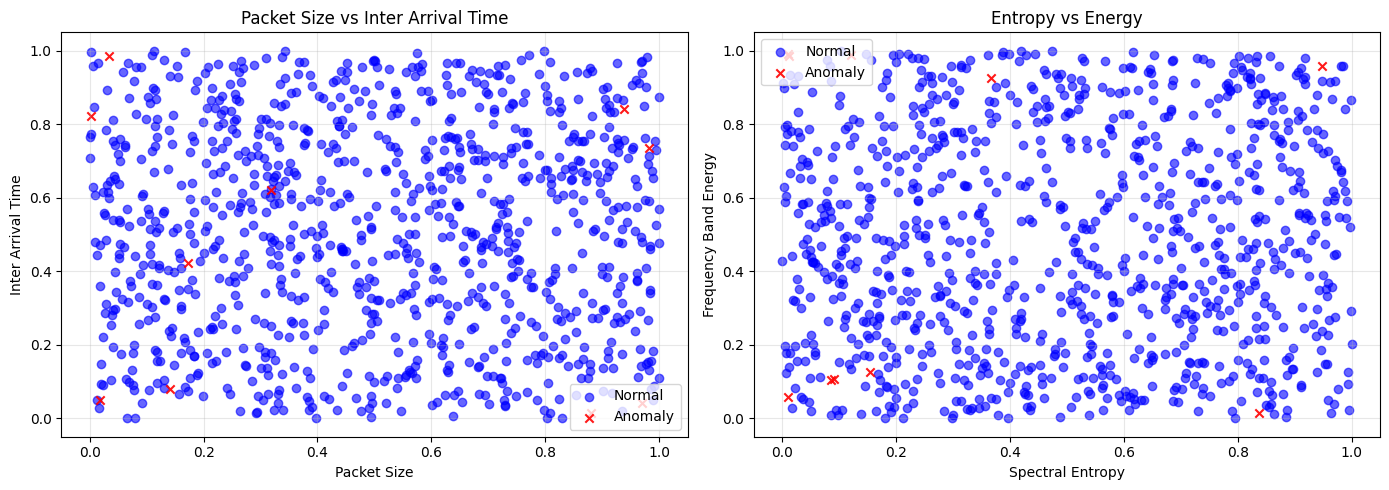

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

# Plot 1: Packet Size vs Inter Arrival Time
axes[0].scatter(normal['packet_size'], normal['inter_arrival_time'],color='blue', label='Normal', alpha=0.6)
axes[0].scatter(anomaly['packet_size'], anomaly['inter_arrival_time'],color='red', label='Anomaly', alpha=0.9, marker='x')
axes[0].set_xlabel('Packet Size')
axes[0].set_ylabel('Inter Arrival Time')
axes[0].set_title('Packet Size vs Inter Arrival Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Spectral Entropy vs Frequency Band Energy
axes[1].scatter(normal['spectral_entropy'], normal['frequency_band_energy'],color='blue', label='Normal', alpha=0.6)
axes[1].scatter(anomaly['spectral_entropy'], anomaly['frequency_band_energy'],color='red', label='Anomaly', alpha=0.9, marker='x')
axes[1].set_xlabel('Spectral Entropy')
axes[1].set_ylabel('Frequency Band Energy')
axes[1].set_title('Entropy vs Energy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [16]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=normal['packet_size'],
    y=normal['inter_arrival_time'],
    z=normal['spectral_entropy'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=5,
        color=normal['frequency_band_energy'],
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='Energy')
    )
))

fig.add_trace(go.Scatter3d(
    x=anomaly['packet_size'],
    y=anomaly['inter_arrival_time'],
    z=anomaly['spectral_entropy'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=7,
        color=anomaly['frequency_band_energy'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))

fig.update_layout(
    title='4D Scatter Plot (Color = Energy)',
    scene=dict(
        xaxis_title='Packet Size',
        yaxis_title='Inter Arrival Time',
        zaxis_title='Spectral Entropy'
    ),
    width=900,
    height=700
)

fig.show()
